**SIGN LANGUAGE MNIST CLASSIFICATION**
---


---

**About the Data**

The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

**Kaggle Link :** [Sign-language-mnist](https://www.kaggle.com/datamunge/sign-language-mnist)

**Goal :** Classification sign language mnist (a-y alphabet)

**Dataset   :** Dataset is given in the form of labels and pixel value from pixel 1 to pixel 784 so the image size is 28 * 28.

**Model   :** Convolutional Neural Network

## Preprocessing Data

**1. Import Library**

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.python.keras import Sequential

**2. Mount google drive to google colab**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**3. Change directory to google drive folder (sign-language MLCC) to save the model in cloud folder**

In [0]:
%cd drive/My Drive

/content/drive/My Drive


**4. Read CSV file from dataset using pandas. And save to new variable**

In [0]:
#Train Dataset
train = pd.read_csv('/content/drive/My Drive/sign_mnist_train.csv')
#Test Dataset
test = pd.read_csv('/content/drive/My Drive/sign_mnist_test.csv')

In [0]:
#Read the dataset
display(train)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


**5. Make a label variable**

In [0]:
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

**6. Check the data distribution**

Below we can see the data distribution.

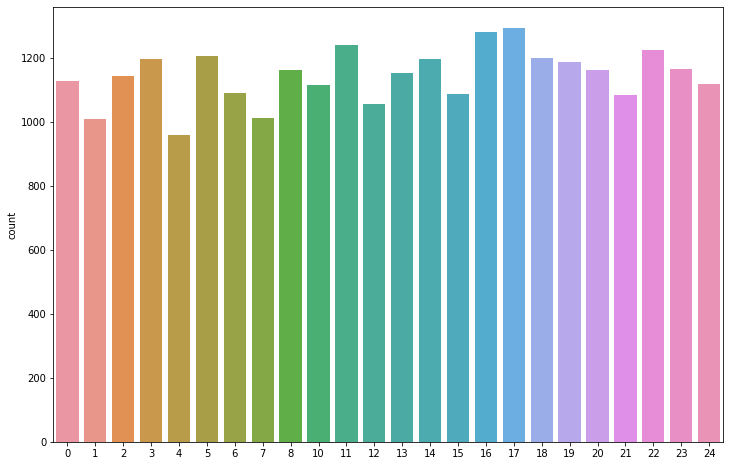

In [0]:
plt.figure(figsize = (12,8))
sns.countplot(x =labels)

**7. Drop the label column to make feature variable**

In [0]:
train.drop('label', axis = 1, inplace = True)

**8. Change feature variable from column to image format**

We need to change the dataset format from column pixel value to 2D array image because we will use CNN.

In [0]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

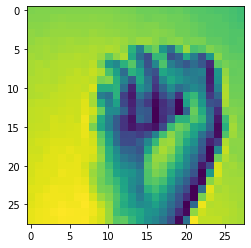

In [0]:
#example 1 image
plt.imshow(images[20].reshape(28,28))

**9. Transform label format to categorical**

Since our target variable are in categorical(nomial) so we are using label binarizer

In [0]:
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


**10. Split Data**

![alt text](https://miro.medium.com/max/1552/1*Nv2NNALuokZEcV6hYEHdGA.png)

Split the dataset to 80% train 20% validation.

And test data was splited in kaggle.

In [0]:
x_train, x_validation, y_train, y_validation = train_test_split(images, labels, test_size = 0.2, stratify = labels, random_state = 7)

**11. Reshape our rows as square tables for Input in CNN Method**

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)

**12. Augmentation Data to balance the dataset**

![alt text](https://www.pyimagesearch.com/wp-content/uploads/2019/07/keras_data_augmentation_in_place.png)

Augmentasi data mencakup berbagai teknik yang digunakan untuk menghasilkan sampel pelatihan "baru" dari yang asli dengan menerapkan teknik transformasi tanpa merubah label kelas.

Cara kerja ImageDataGenerator
1.   Masukan kumpulan gambar data latih ke dalam ImageDataGenerator
2.   ImageDataGenerator akan merubah sebuah gambar menjadi sekumpulan gambar yang sudah di transformasi sesuai dengan keperluan
3.   Hasilnya akan dikembalikan menjadi calling function





In [0]:
#initiate ImageDataGenerator to augmentate data train to rescale and zoom
train_datagen = ImageDataGenerator(rescale=1.0/255.0, zoom_range=0.2)
#initiate ImageDataGenerator to augmentate data validation to rescale
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [0]:
#input the data to ImageDataGenerator
x_train_set = train_datagen.flow(x_train,y_train,batch_size=32)
x_validation_set = validation_datagen.flow(x_validation,y_validation,batch_size=32)

## Build Model CNN

**12. Build Architecture Model CNN**

In [0]:
# Initialising the CNN
classifier = Sequential()
 
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))  # 2x2 is optimal
 
# Adding a second convolutional layer
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5))
 
# Adding a third convolutional layer
classifier.add(Conv2D(256, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5))
 
# Step 3 - Flattening
classifier.add(Flatten())
 
# Step 4 - Full connection
classifier.add(Dense(units=1000, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=24, activation='softmax'))

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 128)       36992     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 128)        

**13. Train the model**

In [32]:
# Train the Model
history = classifier.fit_generator(
    x_train_set,
    steps_per_epoch=len(x_train)/100,
    epochs=150,
    validation_data=x_validation_set,
    validation_steps=len(x_validation)/100)

Epoch 1/150
220/219 [==============================] - 34s 157ms/step - loss: 3.1758 - accuracy: 0.0444 - val_loss: 3.1747 - val_accuracy: 0.0429
Epoch 2/150
220/219 [==============================] - 34s 157ms/step - loss: 2.8412 - accuracy: 0.1303 - val_loss: 2.1783 - val_accuracy: 0.2364
Epoch 3/150
220/219 [==============================] - 34s 155ms/step - loss: 1.8089 - accuracy: 0.3861 - val_loss: 1.0344 - val_accuracy: 0.6864
Epoch 4/150
220/219 [==============================] - 34s 155ms/step - loss: 1.2133 - accuracy: 0.5741 - val_loss: 0.6316 - val_accuracy: 0.7756
Epoch 5/150
220/219 [==============================] - 34s 155ms/step - loss: 0.9041 - accuracy: 0.6801 - val_loss: 0.4320 - val_accuracy: 0.8386
Epoch 6/150
220/219 [==============================] - 34s 155ms/step - loss: 0.7360 - accuracy: 0.7290 - val_loss: 0.3850 - val_accuracy: 0.8903
Epoch 7/150
220/219 [==============================] - 34s 157ms/step - loss: 0.6068 - accuracy: 0.7880 - val_loss: 0.2403 -

**14. Visualize the training and validation history**

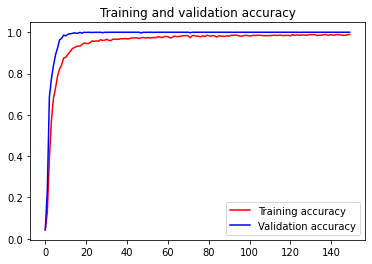

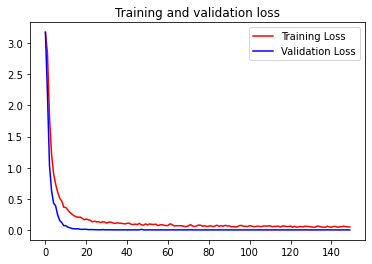

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Test model with Test Data

**1. Assign label in test data to new variable**

In [0]:
test_labels = test['label']

**2. Drop label column to make input data as feature**

In [0]:
test.drop('label', axis = 1, inplace = True)

**3. Change feature variable from column to image format**

We need to change the dataset format from column pixel value to 2D array image because we will use CNN.

In [0]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

**4. Transform label format to categorical**

Since our target variable are in categorical(nomial) so we are using label binarizer

In [0]:
test_labels = label_binrizer.fit_transform(test_labels)

**5. Reshape our rows as square tables for Input in CNN Method**

In [0]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

**6. Predict the Test data using model pre-trained**

In [0]:
y_pred = classifier.predict(test_images)

**7. Calculate the accuracy**

In [41]:
accuracy = accuracy_score(test_labels, y_pred.round())
print("Accuracy Test Data = {:0.2f} %".format(accuracy*100))

Accuracy Test Data = 97.49 %


**8. Save model pre-trained**

In [0]:
classifier.save('mode_sign_v1.h5')